In [1]:
# Import some basic libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_context('paper')

# Hands-On Activity 6.2: The Multivariate Normal - Full Covariance Case

## Objectives

+ To introduce the multivariate normal with full covariance.

## The multivariate mormal - Full covariance case

Consider the $N$-dimensional multivariate normal:
$$
\mathbf{X} \sim N\left(\boldsymbol{\mu}, \boldsymbol{\Sigma}\right),
$$
where $\boldsymbol{\mu}$ is a $N$-dimensional vector, $\boldsymbol{\Sigma}$ is a *positive-definite matrix*.
Let's plot contours and take samples.

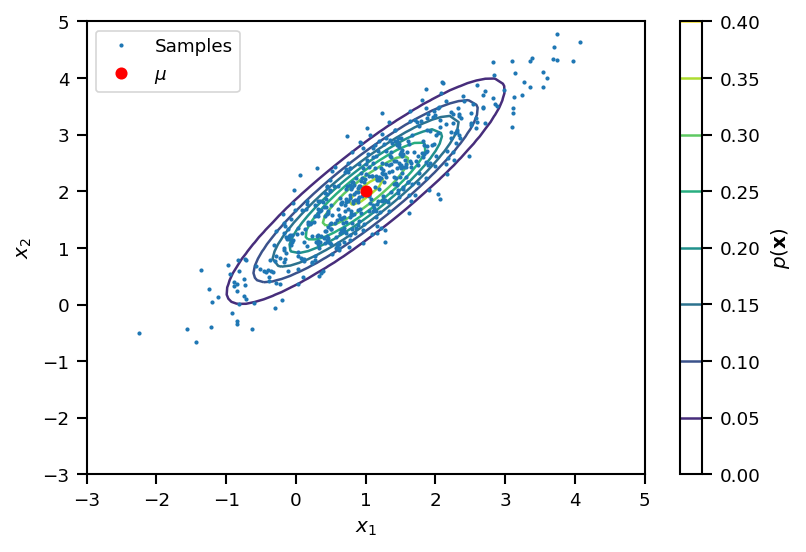

In [2]:
import scipy.stats as st
# The mean vector
mu = [1.0, 2.0]
# The covariance matrix
Sigma = np.array([[1.0, 0.9],
                   [0.9, 1.0]])
# The multivariate normal random vector
X = st.multivariate_normal(mean=mu, cov=Sigma)

# CONTOURS
fig, ax = plt.subplots(dpi=150)
# The contours
# Points along x1 dimension
x1 = np.linspace(-3, 5, 64)
# Points along x2 dimension
x2 = np.linspace(-3, 5, 64)
# Create grid
X1, X2 = np.meshgrid(x1, x2)
# Flattened values of grid points
X_flat = np.hstack([X1.flatten()[:, None], X2.flatten()[:, None]])
# PDF values
pdf_X = X.pdf(X_flat).reshape(X1.shape)
# Plot contours
c = ax.contour(X1, X2, pdf_X)
plt.colorbar(c, label='$p(\mathbf{x})$')

# SAMPLES
num_samples = 500
x_samples = X.rvs(size=num_samples)
ax.plot(x_samples[:, 0], x_samples[:, 1], '.', markersize=2, label='Samples')
# Plot the mean
ax.plot(X.mean[0], X.mean[1], 'ro', label='$\mu$')
plt.legend(loc='best')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$');

## Questions
+ Rerun the steps above after moving $\boldsymbol{\mu}$ to $(0, 1)$. Observe how the contours of the PDF move.
+ Rerun the steps above for $\Sigma_{12} = \Sigma_{21} = 0.1$. Observe how the contours of the PDF change.
+ Rerun the steps above for $\Sigma_{12} = \Sigma_{21} = -0.9$. Observe how the contours of the PDF change.
+ Rerun the steps above for $\Sigma_{11} = 0.4$. Why does the code fail?

## The covariance matrix must be positive definite so that $p(\mathbf{x})$ has a well-defined, unique maximum

In the lecture we argued that the covariance matrix $\boldsymbol{\Sigma}$ must be positive definite so that the PDF of $\mathbf{X}$ has a unique maximum. Let's try to understand this step by step.
First, what does it mean for a matrix to be positive definite.
The mathematical definition stats that for any vector $\mathbf{v}\not=\mathbf{0}$, the quantity $\mathbf{v}^T\boldsymbol{\Sigma}\mathbf{v}$ is positive.
Let's just test this quantity for two different matrices with random vectors.

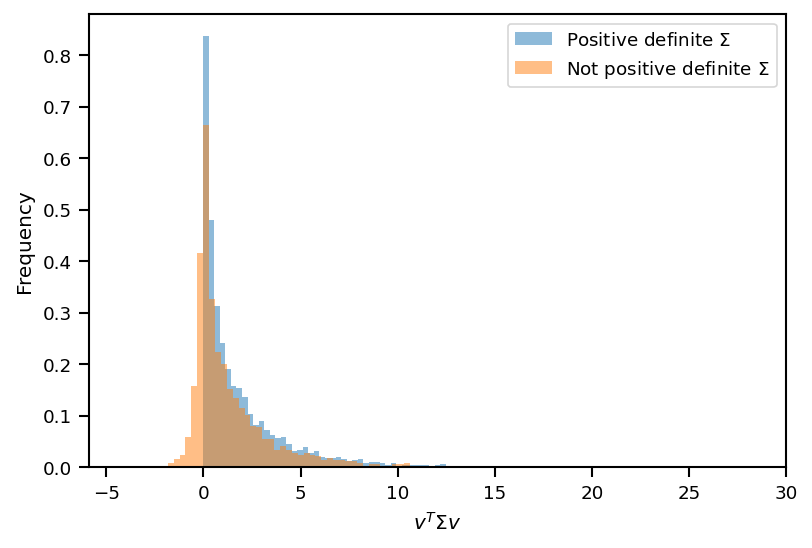

In [3]:
# A covariane matrix that we know works
Sigma_good = np.array([[1.0, 0.9],
                       [0.9, 1.0]])
# A covariance matrix that we know does not work
Sigma_bad = np.array([[0.4, 0.9],
                      [0.9, 1.0]])
# Take random vectors and compute at quantity
num_vectors = 5000
Q_good = np.ndarray((num_vectors,))
Q_bad = np.ndarray((num_vectors,))
for i in range(num_vectors):
    v = np.random.randn(2)
    Q_good[i] = np.dot(v, np.dot(Sigma_good, v))
    Q_bad[i] = np.dot(v, np.dot(Sigma_bad, v))

# Let's do the histograms of these quantities to see whether or not they are positive
fig, ax = plt.subplots(dpi=150)
ax.hist(Q_good, density=True, alpha=0.5, bins=100, label='Positive definite $\Sigma$')
ax.hist(Q_bad, density=True, alpha=0.5, bins=100, label='Not positive definite $\Sigma$')
ax.set_xlabel(r'$v^T\Sigma v$')
ax.set_ylabel('Frequency')
plt.legend(loc='best');

Observe that the non-positive definite matrix is giving us quite a few negative value.
Is there a way to check if a matrix is positive definite without doing this random test?
Yes, you just check if all the eigenvalues of the matrix are positive. Here is how:

In [4]:
print('Eigenvalues of Sigma_good', np.linalg.eigh(Sigma_good)[0])
print('Eigenvalues of Sigma_bad', np.linalg.eigh(Sigma_bad)[0])

Eigenvalues of Sigma_good [0.1 1.9]
Eigenvalues of Sigma_bad [-0.2486833  1.6486833]


... And you see that the second one has a negative eigenvlue.

Finally, let's visualize the contour of the probability densty and see with our own eyes that it does not have a unique minimum when the matrix $\boldsymbol{\Sigma}$ is not positive definite.

In [5]:
def log_pdf_mv(x, mu, Sigma):
    """
    Computes the PDF of the multivariate Gaussian in a way that does not require
    Sigma to be positive definite, so that you can see what happens.
    """
    N = Sigma.shape[0]
    # Just keep in mind that this is one of the most unstable ways of computing the log pdf
    return -0.5 * N * np.log(2.0 * np.pi) - 0.5 * np.linalg.det(Sigma) - 0.5 * np.dot((x - mu), np.dot(np.linalg.inv(Sigma), x - mu))

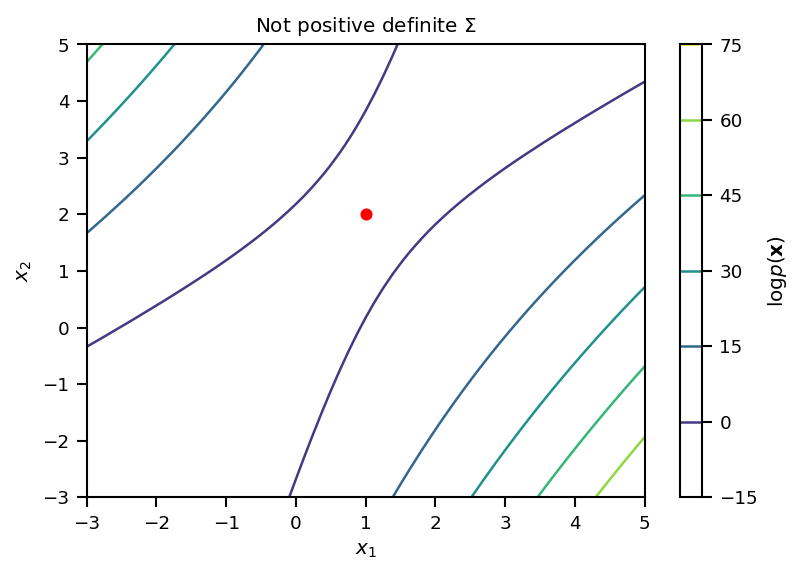

In [6]:
# CONTOUR
fig, ax = plt.subplots(dpi=150)
# The contours
# Points along x1 dimension
x1 = np.linspace(-3, 5, 64)
# Points along x2 dimension
x2 = np.linspace(-3, 5, 64)
# Create grid
X1, X2 = np.meshgrid(x1, x2)
# Flattened values of grid points
X_flat = np.hstack([X1.flatten()[:, None], X2.flatten()[:, None]])
# PDF values
pdf_X_bad = np.ndarray((64, 64))
for i in range(64):
    for j in range(64):
        pdf_X_bad[i, j] = log_pdf_mv(np.array([X1[i, j], X2[i, j]]), mu, Sigma_bad)
# Plot contours
c = ax.contour(X1, X2, pdf_X_bad)
plt.colorbar(c, label='$\log p(\mathbf{x})$')
# Add the mean
ax.plot(X.mean[0], X.mean[1], 'ro', label='$\mu$')
ax.set_title('Not positive definite $\Sigma$')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$');

Notice that $\boldsymbol{\mu}$ is not a maximum of $\log p(\mathbf{x})$ but a saddle point. 

## Questions

+ Rerun the code above for $\Sigma_{12} = \Sigma_{21} = -0.9$ (both for the "good" and the "bad" covariance).

## Sampling the multivariate normal with diagonal covariance using the standard normal

In the lecture we showed that if $\mathbf{Z}$ is an $N$-dimensional standard normal:
$$
\mathbf{Z} \sim N(0,\mathbf{I}),
$$
where $\mathbf{I}$ is the $N\times N$ unit matrix (all zeros except the diagonal which is all ones), then the random vector:
$$
\mathbf{X} = \boldsymbol{\mu} + \mathbf{A}\mathbf{Z},
$$
is a multivariate normal:
$$
\mathbf{X} \sim N\left(\boldsymbol{\mu}, \boldsymbol{\Sigma})\right),
$$
with
$$
\boldsymbol{\Sigma} = \mathbf{A}\mathbf{A}^T.
$$
Such a matrix $\mathbf{A}$ is non-unique and is is called a "square root" of $\boldsymbol{\Sigma}$.
The most commonnly used square root of $\boldsymbol{\Sigma}$, however, is the [Cholesky](https://www.youtube.com/watch?v=TprfUB3nI8Y) (and pronounced KOLESKI not TSOLESKI or SHOLESKI  -- at least by the people who taught me linear algebra!)
In the Cholesky decomposition $\mathbf{A}$ is a lower triangular matrix (everything above the diagonal is zero) and the diagonal contains only positive numbers.
Let's find the Cholesky decomposition of a positive definite $\boldsymbol{\Sigma}$:

In [ ]:
# A covariane matrix that we know works
Sigma = np.array([[1.0, 0.9],
                 [0.9, 1.0]])
A = np.linalg.cholesky(Sigma)
print('A = ', A)

In [ ]:
# As a sanity check let's see if A * A.T gives us Sigma
print('A * A.T = ', np.dot(A, A.T))
print('Compare to Sigma = ', Sigma)

Let's now verify that if we sample $\mathbf{Z}$ from $N(\mathbf{0},\mathbf{I})$ and evaluate $\mathbf{X} = \boldsymbol{\mu} + \mathbf{A}\mathbf{Z}$, then $\mathbf{X}$ will be distributed according to $N(\boldsymbol{\mu},\boldsymbol{\Sigma}$.

In [ ]:
# The multivariate normal that you want to study:
# The mean vector
mu = [1.0, 2.0]

# Repeating Sigma here. Change it here for the questions:
Sigma = np.array([[1.0, 0.9],
                 [0.9, 1.0]])
A = np.linalg.cholesky(Sigma)

# Create the random variable using scipy.stats
X = st.multivariate_normal(mean=mu, cov=Sigma)

# The number of samples you want to take:
num_samples = 500
# Here is how you can sample from Z:
z_samples = np.random.randn(num_samples, 2)
# Transforms these to samples of X 
x_samples = mu + np.einsum('ij,nj->ni', A, z_samples)
# If you have never seen an Einstein sum, you may want to read this: 
# https://numpy.org/doc/stable/reference/generated/numpy.einsum.html?highlight=einsum#numpy.einsum
# Ridiculously useful... 

# Visualize everything
fig, ax = plt.subplots(dpi=150)
# The contours
# Points along x1 dimension
x1 = np.linspace(-3, 5, 64)
# Points along x2 dimension
x2 = np.linspace(-3, 5, 64)
# Create grid
X1, X2 = np.meshgrid(x1, x2)
# Flattened values of grid points
X_flat = np.hstack([X1.flatten()[:, None], X2.flatten()[:, None]])
# PDF values
pdf_X_flat = X.pdf(X_flat).reshape(X1.shape)
# Plot contours
c = ax.contour(X1, X2, pdf_X_flat)
# Plot the samples
ax.plot(x_samples[:, 0], x_samples[:, 1], '.', markersize=2)
# Plot the mean
ax.plot(X.mean[0], X.mean[1], 'ro');

... and that's how we sample from a multivariate Gaussian.

## Questions

+ Rerun the steps above after moving $\boldsymbol{\mu}$ to $(0, 1)$. Observe how the contours of the PDF move.
+ Rerun the steps above for $\Sigma_{12} = \Sigma_{21} = 0.1$. Observe how the contours of the PDF change.
+ Rerun the steps above for $\Sigma_{12} = \Sigma_{21} = -0.9$. Observe how the contours of the PDF change.